In [21]:
# For local circular coordinates coordinatization (optional)
from dreimac import CircularCoords    

from circle_bundles.bundle import build_bundle
from circle_bundles.base_covers import MetricBallCover
from circle_bundles.synthetic.tori_and_kb import sample_C2_torus

from circle_bundles.metrics import (
    RP1AngleMetric as rp1_metric,
    Torus_DiagQuotientMetric_R4 as diag_metric,
    Torus_KleinQuotientMetric_R4 as kb_metric
)

from circle_bundles.synthetic.s2_bundles import sample_sphere, hopf_projection
from circle_bundles.covers.triangle_cover_builders_fibonacci import make_rp2_fibonacci_star_cover


# Example 1:  The Quotient Torus $\mathbb{T}^{2}/(z,w)\sim (-z,-w)$ and Klein Bottle $K = \mathbb{T}^{2}/(z,w)\sim (-z,\overline{w})$ as Circle Bundles Over $\mathbb{RP}^{1}$

In [6]:
#Generate a sample from the trivial (product) bundle over S1

n_samples = 5000
sigma = 0.05
data, base_points, alpha, theta, r_vals = sample_C2_torus(
    n_points = n_samples,
    sigma = sigma,
    return_theta = True,
    return_alpha = True
)

print(f'Generated {n_samples} samples from the product circle bundle over S1.')


Generated 5000 samples from the product circle bundle over S1.


### Cover And Nerve Summary
- $n_\text{sets} = 12$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 12$
- $\#(\text{1-simplices}) = 12$
- *No recorded simplices in dimensions* $\ge 2$

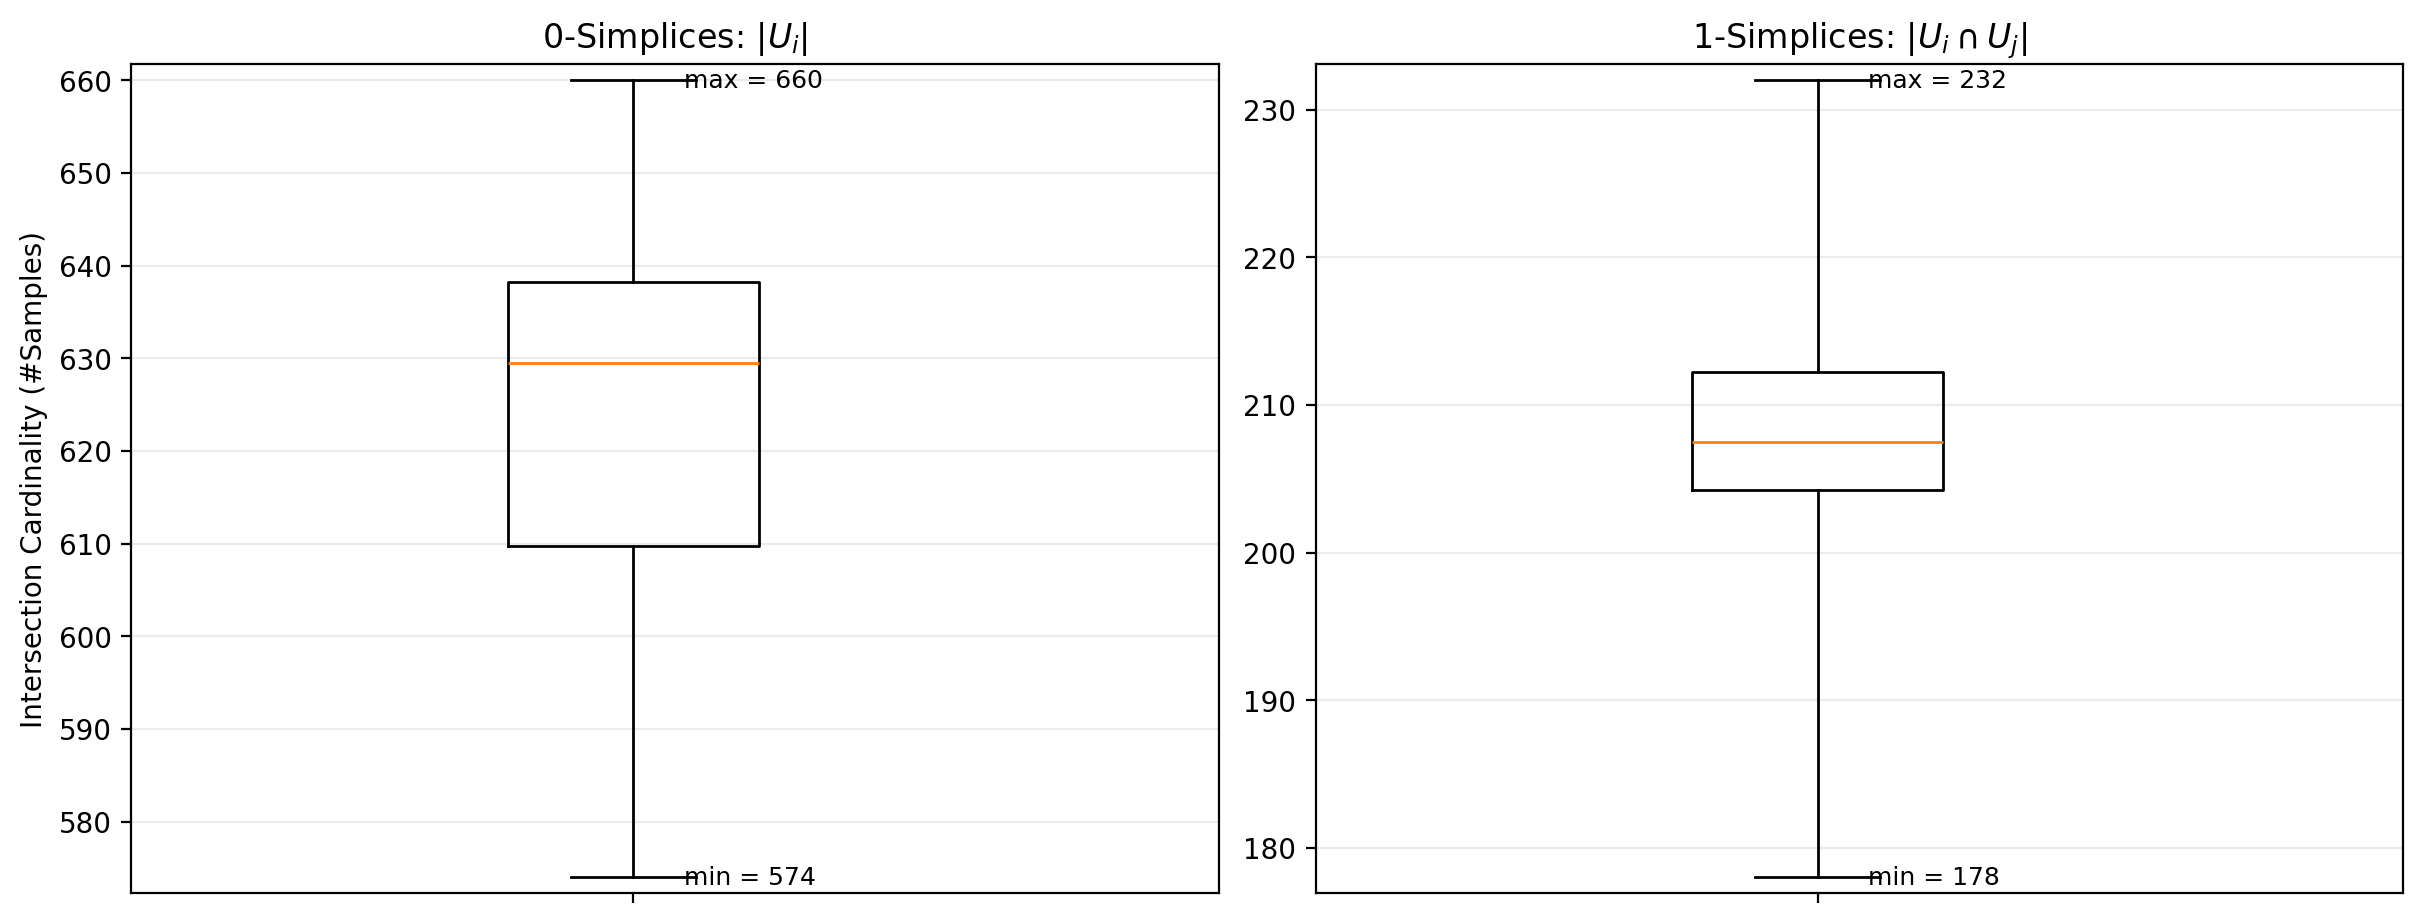

In [11]:
#Construct a cover of the base space (the base space will be RP1 after quotienting)

n_landmarks = 12
landmarks = np.linspace(0, np.pi, n_landmarks, endpoint= False)
overlap = 1.5
radius = overlap * np.pi/(2*n_landmarks)

cover = MetricBallCover(theta%np.pi, landmarks, radius, metric = rp1_metric())
cover_data = cover.build()
summ = cover.summarize(plot = True)



In [17]:
#Construct local circular coordinates and model transitions as O(2) matrices

total_metric = kb_metric()  #CHOOSE A METRIC (kb_metric or diag_metric)

bundle = build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,    #optionally use sparse cc's
    show=True,
    total_metric = total_metric
)


<IPython.core.display.Math object>

In [18]:
#Construct a classifying map to the Stiefel manifold and compute the pullback bundle
pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=1.0,
    packing = 'coloring2'
)


<IPython.core.display.Math object>

In [19]:
#Construct a pullback coordinate bundle object

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)


<IPython.core.display.Math object>

# Lens Spaces $L(p,1) = \mathbb{S}^{3}/\mathbb{Z}_{p}$ As Circle Bundles Over $\mathbb{S}^{2}$

In [22]:
n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)

print(f'{n_samples} samples from S3 generated.')

10000 samples from S3 generated.


In [24]:
#Compute base projections to S2
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v = v)
print(f'Base projections computed.')

Base projections computed.


In [25]:
#Construct an open cover of S2

n_landmarks = 80
cover = make_s2_fibonacci_star_cover(base_points, n_vertices = n_landmarks)
summ = cover.summarize(plot = True)

AttributeError: module 'circle_bundles' has no attribute 'make_s2_fibonacci_star_cover'

In [ ]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import S3QuotientMetric

p = 4   #Choose a p-value for the quotient metric
total_metric = S3QuotientMetric(p=p, v_axis = v, antipodal = False)    

bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse circular coordinates
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


In [ ]:
#Construct a classifying map to the Stiefel manifold and compute the pullback bundle
pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=1.0,
    packing = 'coloring2'
)


In [ ]:
#Construct a pullback coordinate bundle object

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)


# Quotients $(\mathbb{S}^{2}\times\mathbb{S}^{1})/\mathbb{Z}_{2}$ As Circle Bundles Over $\mathbb{RP}^{2}$ 

In [ ]:
#Generate a sample from the trivial bundle over S2
from synthetic.s2_bundles import sample_S2_trivial

n_samples = 10000
sigma = 0.05
data, base_points, angles = sample_S2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)
print(f'Generated {n_samples} samples from the product circle bundle over S2.')

In [ ]:
#Map base points to upper half sphere for visualization
base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_landmarks = 80
cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes

metrics = [cb.RP2_TrivialMetric(), cb.RP2_TwistMetric(), cb.RP2_FlipMetric()]  
           
j = 1         #Choose a metric on the total space
total_metric = metrics[j]


bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


In [ ]:
#Construct a classifying map to the Stiefel manifold and compute the pullback bundle
pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=1.0,
    packing = 'coloring2'
)


In [ ]:
#Construct a pullback coordinate bundle object

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)


# Quotients $\mathbb{S}^{3}/(\mathbb{Z}_{p}\rtimes\mathbb{Z}_{2})$ As Circle Bundles Over $\mathbb{RP}^{2}$

In [ ]:
from synthetic import sample_sphere, hopf_projection

n_samples = 10000
data = sample_sphere(n = n_samples, dim = 3)
v = np.array([1, 0, 0]) 
base_points = hopf_projection(data=data, v= v)


print(f'Generated {n_samples} samples from the product circle bundle over S2.')

In [ ]:
#Construct an open cover of RP2
n_landmarks = 80
cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
summ = cover.summarize(plot = True)

In [ ]:
#Compute local trivializations and characteristic classes using a quotient metric on S3
from circle_bundles.metrics import S3QuotientMetric


p = 2  #Choose a p-value for the quotient metric
total_metric = S3QuotientMetric(p = p, v_axis = v, antipodal = True)

bundle = cb.build_bundle(
    data,
    cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's 
    total_metric = total_metric,
    show=True,
)
